# Análise de Dados do Setor Aéreo

1)	Análise de Companhias Aéreas

1 - Quais são as principais companhias aéreas que mais voaram durante cada ano?

2 - A pandemia afetou a operação de alguma delas? De que forma?

3 - Quais as companhias que alteraram mais voos durante a pandemia?

4 - Quais as principais rotas aéreas das principais companhias?

5 - Qual é a companhia que tem maior % de cancelamento de voos e atraso?


2)	Análise da eficiência das rotas.

 1- Quais as principais rotas de voos?

2- Quais as rotas em que temos maior tempo de atraso?

3- Quais as rotas em que temos maior índice de cancelamento de voos?

4- Quais são as rotas mais eficientes e as menos eficientes?


3)	Análise do atraso das rotas

1- Qual o tempo médio de atraso dos voos? Considere as colunas ArrDelayMinutes e DepDelayMinutes.
       
2- Quais os fatores mais correlacionados com o atraso de um voo?


Modelagem:

4)	Modelo de regressão linear em que queremos estimar o tempo de atraso de um voo, considere o atraso da partida variável (DepDelayMinutes). Foram construídas variáveis dummy a partir de categorias como: mês do ano e rotas específicas.   



# ✨ Bibliotecas


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Manipulação dos dados em python
import pandas as pd
import numpy as np

# Visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Obter estatisticas de teste
from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm

#Regressao Logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# ✨ Importacao dos dados

In [ ]:
# Leitura dos dados csv
df0 = pd.read_csv("Airlines.csv")
df1 = pd.read_csv("Sample_combined_flights_2018.csv")
df2 = pd.read_csv("Sample_combined_flights_2019.csv")
df3 = pd.read_csv("Sample_combined_flights_2020.csv")
df4 = pd.read_csv("Sample_combined_flights_2021.csv")
df5 = pd.read_csv("Sample_combined_flights_2022.csv")

In [ ]:
df0.head()

In [ ]:
df1.head()

In [ ]:
df2.head()

In [ ]:
df3.head()

In [ ]:
df4.head()

In [ ]:
df5.head()

# ✨ Estruturacao dos dataframes

In [ ]:
# Boas praticas - copia dos Dataframes
df18 = df1.copy()
df19 = df2.copy()
df20 = df3.copy()
df21 = df4.copy()
df22 = df5.copy()

# df_completo -  contem os csvs de todos os anos em um mesmo dataframe


In [ ]:
# Lista dos dataframes
dfs = [df18, df19, df20, df21, df22]

# Concatenando todos os dataframes
df_completo = pd.concat(dfs, ignore_index=True)

# Verificando as primeiras linhas do dataframe combinado
print(df_completo.head())


   Unnamed: 0  FlightDate            Airline Origin Dest  Cancelled  Diverted  \
0           0  2018-01-05  Endeavor Air Inc.    ATL  ABY      False     False   
1           1  2018-01-14  Endeavor Air Inc.    ATL  ABY      False     False   
2           2  2018-01-04  Endeavor Air Inc.    EWN  ATL       True     False   
3           3  2018-01-09  Endeavor Air Inc.    FAY  ATL      False     False   
4           4  2018-01-15  Endeavor Air Inc.    CSG  ATL      False     False   

   CRSDepTime  DepTime  DepDelayMinutes  ...  WheelsOff  WheelsOn  TaxiIn  \
0        1037   1032.0              0.0  ...     1052.0    1121.0     3.0   
1        1037   1031.0              0.0  ...     1047.0    1117.0     3.0   
2        1415      NaN              NaN  ...        NaN       NaN     NaN   
3        1853   1850.0              0.0  ...     1900.0    2004.0    17.0   
4         615    625.0             10.0  ...      634.0     656.0     8.0   

   CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGro

#1) Análise dos dados
Análise de Companhias Aéreas

1 - Quais são as principais companhias aéreas que mais voaram durante cada ano?

2 - A pandemia afetou a operação de alguma delas? De que forma?

3 - Quais as companhias que alteraram mais voos durante a pandemia?

4 - Quais as principais rotas aéreas das principais companhias?

5 - Qual é a companhia que tem maior % de cancelamento de voos e atraso?

##1.1
Quais são as principais companhias aéreas que mais voaram durante cada ano?

In [ ]:
df1.columns

Index(['Unnamed: 0', 'FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled',
       'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay',
       'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime',
       'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
       'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline',
       'Operating_Airline', 'DOT_ID_Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number',
       'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 

In [ ]:
pd.set_option('display.max_columns', None)
df1.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2018-01-05,Endeavor Air Inc.,ATL,ABY,False,False,1037,1032.0,0.0,-5.0,1124.0,0.0,29.0,60.0,52.0,145.0,2018,1,1,5,5,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8877A,3298,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,0.0,-1.0,1000-1059,20.0,1052.0,1121.0,3.0,1137,-13.0,0.0,-1.0,1100-1159,1,0.0
1,1,2018-01-14,Endeavor Air Inc.,ATL,ABY,False,False,1037,1031.0,0.0,-6.0,1120.0,0.0,30.0,60.0,49.0,145.0,2018,1,1,14,7,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N836AY,3298,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,0.0,-1.0,1000-1059,16.0,1047.0,1117.0,3.0,1137,-17.0,0.0,-2.0,1100-1159,1,0.0
2,2,2018-01-04,Endeavor Air Inc.,EWN,ATL,True,False,1415,NaN,NaN,NaN,NaN,NaN,NaN,110.0,NaN,433.0,2018,1,1,4,4,DL,DL_CODESHARE,19790,DL,3301,9E,20363,9E,N836AY,3301,11617,1161708,31617,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,NaN,NaN,1400-1459,NaN,NaN,NaN,NaN,1605,NaN,NaN,NaN,1600-1659,2,0.0
3,3,2018-01-09,Endeavor Air Inc.,FAY,ATL,False,False,1853,1850.0,0.0,-3.0,2021.0,0.0,64.0,97.0,91.0,331.0,2018,1,1,9,2,DL,DL_CODESHARE,19790,DL,3302,9E,20363,9E,N8869B,3302,11641,1164102,31641,"Fayetteville, NC",NC,37,North Carolina,36,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1800-1859,10.0,1900.0,2004.0,17.0,2030,-9.0,0.0,-1.0,2000-2059,2,0.0
4,4,2018-01-15,Endeavor Air Inc.,CSG,ATL,False,False,615,625.0,10.0,10.0,704.0,0.0,22.0,56.0,39.0,83.0,2018,1,1,15,1,DL,DL_CODESHARE,19790,DL,3306,9E,20363,9E,N832AY,3306,11150,1115005,31150,"Columbus, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,0.0,0600-0659,9.0,634.0,656.0,8.0,711,-7.0,0.0,-1.0,0700-0759,1,0.0


In [ ]:
#dfat = df AirTime
dfat2018 = df1[['Airline', 'AirTime']]

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
dfat2018

,Airline,AirTime
0,Endeavor Air Inc.,29.0
1,Endeavor Air Inc.,30.0
2,Endeavor Air Inc.,NaN
3,Endeavor Air Inc.,64.0
4,Endeavor Air Inc.,22.0
...,...,...
56821,United Air Lines Inc.,94.0
56822,Air Wisconsin Airlines Corp,25.0
56823,"Commutair Aka Champlain Enterprises, Inc.",71.0
56824,"GoJet Airlines, LLC d/b/a United Express",143.0


In [ ]:
dfat2018['Airline'].unique()

array(['Endeavor Air Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
       'Allegiant Air', 'Hawaiian Airlines Inc.', 'Spirit Air Lines',
       'SkyWest Airlines Inc.', 'Frontier Airlines Inc.',
       'Empire Airlines Inc.', 'Southwest Airlines Co.',
       'Mesa Airlines Inc.', 'Republic Airlines', 'Delta Air Lines Inc.',
       'United Air Lines Inc.', 'Alaska Airlines Inc.',
       'Commutair Aka Champlain Enterprises, Inc.',
       'Trans States Airlines',
       'GoJet Airlines, LLC d/b/a United Express',
       'Air Wisconsin Airlines Corp', 'Cape Air', 'Horizon Air',
       'Compass Airlines', 'Virgin America', 'Peninsula Airways Inc.',
       'Envoy Air', 'American Airlines Inc.', 'Comair Inc.',
       'Capital Cargo International'], dtype=object)

###❗ NaN - para esses valores deve haver uma substituicao por zero, media, moda e mediana. Foram plotados histogramas para entender a distribuicao dos dados e optar pela melhor escolha. Foi feita a substituicao pela MEDIANA.

### ❗ Histogramas - plotados para compreensao da distribuicao dos dados e identificacao de outliers. Para posterior tratamento e substituicao de NaNs.

In [ ]:
'''dfat1_2018 = dfat2018[dfat2018['Airline'] == 'Endeavor Air Inc.']'''

"dfat1_2018 = dfat2018[dfat2018['Airline'] == 'Endeavor Air Inc.']"

In [ ]:
'''# Histograma
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(dfat1_2018['Airline'], bins=30, kde=True)
plt.title(f'Histograma de {'Airline'}')
'''

"# Histograma\nplt.figure(figsize=(12, 5))\nplt.subplot(1, 2, 1)\nsns.histplot(dfat1_2018['Airline'], bins=30, kde=True)\nplt.title(f'Histograma de {'Airline'}')\n"

In [ ]:
'''dfat2_2018 = dfat2018[dfat2018['Airline'] == 'JetBlue Airways']'''

"dfat2_2018 = dfat2018[dfat2018['Airline'] == 'JetBlue Airways']"

In [ ]:
'''# Histograma
plt.figure(figsize=(12, 5))
sns.histplot(dfat2_2018[var], bins=30, kde=True)
plt.title(f'Histograma de {var}')'''

"# Histograma\nplt.figure(figsize=(12, 5))\nsns.histplot(dfat2_2018[var], bins=30, kde=True)\nplt.title(f'Histograma de {var}')"

### Presenca de muitos outliers

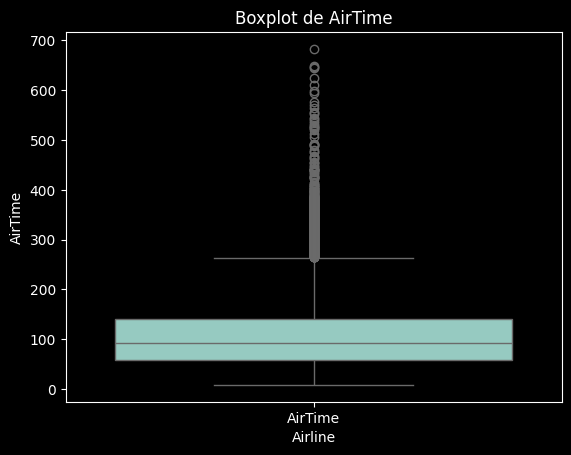

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando o estilo para fundo preto
plt.style.use('dark_background')

# Criando o boxplot
sns.boxplot(data=dfat2018)
plt.title('Boxplot de AirTime')
plt.xlabel('Airline')
plt.ylabel('AirTime')
plt.show()


In [ ]:
'''for var in dfat2_2018.columns:
    if dfat2_2018[var].dtype in ['int64', 'float64']:  #verificar se a coluna é numérica
        plt.figure(figsize=(12, 5))

        sns.histplot(dfat2_2018[var], bins=30, kde=True)
        plt.title(f'Histograma de {var}')
        plt.xlabel(var)
        plt.ylabel('Frequência')
        plt.show()'''

"for var in dfat2_2018.columns:\n    if dfat2_2018[var].dtype in ['int64', 'float64']:  #verificar se a coluna é numérica\n        plt.figure(figsize=(12, 5))\n\n        sns.histplot(dfat2_2018[var], bins=30, kde=True)\n        plt.title(f'Histograma de {var}')\n        plt.xlabel(var)\n        plt.ylabel('Frequência')\n        plt.show()"

### ❗ Substituir NaN PELA MEDIANA dataframes

In [ ]:
# Supondo que 'df_completo' seja o dataframe que contém os dados para calcular a mediana
df_completo = df_completo.copy()  # Se necessário, você pode criar uma cópia de df_completo para evitar modificações indesejadas.

# Para cada dataframe, substituímos NaN pelas medianas calculadas no df_completo
dfs = [df18, df19, df20, df21, df22]

for df in dfs:
    colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
    for col in colunas_numericas:
        mediana = df_completo[col].median()  # Calculando a mediana usando df_completo
        df[col] = df[col].fillna(mediana)  # Substituindo NaN pela mediana calculada

print(df_completo)


        Unnamed: 0  FlightDate            Airline Origin Dest  Cancelled  \
0                0  2018-01-05  Endeavor Air Inc.    ATL  ABY      False   
1                1  2018-01-14  Endeavor Air Inc.    ATL  ABY      False   
2                2  2018-01-04  Endeavor Air Inc.    EWN  ATL       True   
3                3  2018-01-09  Endeavor Air Inc.    FAY  ATL      False   
4                4  2018-01-15  Endeavor Air Inc.    CSG  ATL      False   
...            ...         ...                ...    ...  ...        ...   
292106       40418  2022-03-29  Republic Airlines    IND  EWR      False   
292107       40419  2022-03-30  Republic Airlines    CLT  EWR      False   
292108       40420  2022-03-30  Republic Airlines    DTW  EWR      False   
292109       40421  2022-03-12  Republic Airlines    BNA  ORD      False   
292110       40422  2022-03-30  Republic Airlines    PVD  EWR      False   

        Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  \
0         

In [ ]:
# Identificar valores NaN após a substituição
nan_values = df[colunas_numericas].isna().sum()  # Conta o número de NaN por coluna
print(f"NaN valores após substituição em {df.columns.tolist()}:")
print(nan_values)


NaN valores após substituição em ['Unnamed: 0', 'FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime

In [ ]:
# Identificar valores NaN nas colunas categóricas
colunas_categoricas = df.select_dtypes(include=['object', 'category']).columns
nan_values_categoricas = df[colunas_categoricas].isna().sum()  # Conta o número de NaN nas colunas categóricas
print(f"NaN valores nas colunas categóricas de {df.columns.tolist()}:")
print(nan_values_categoricas)

NaN valores nas colunas categóricas de ['Unnamed: 0', 'FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSA

dtype

In [ ]:
dfat18 = df18[['Airline', 'AirTime']]
dfat19 = df19[['Airline', 'AirTime']]
dfat20 = df20[['Airline', 'AirTime']]
dfat21 = df21[['Airline', 'AirTime']]
dfat22 = df22[['Airline', 'AirTime']]


In [ ]:
# Lista dos dataframes
dfs = [df18, df19, df20, df21, df22]

# Concatenando todos os dataframes
df_completo = pd.concat(dfs, ignore_index=True)

# Verificando as primeiras linhas do dataframe combinado
print(df_completo.head())

   Unnamed: 0  FlightDate            Airline Origin Dest  Cancelled  Diverted  \
0           0  2018-01-05  Endeavor Air Inc.    ATL  ABY      False     False   
1           1  2018-01-14  Endeavor Air Inc.    ATL  ABY      False     False   
2           2  2018-01-04  Endeavor Air Inc.    EWN  ATL       True     False   
3           3  2018-01-09  Endeavor Air Inc.    FAY  ATL      False     False   
4           4  2018-01-15  Endeavor Air Inc.    CSG  ATL      False     False   

   CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  \
0        1037   1032.0              0.0      -5.0   1124.0              0.0   
1        1037   1031.0              0.0      -6.0   1120.0              0.0   
2        1415   1324.0              0.0      -3.0   1507.0              0.0   
3        1853   1850.0              0.0      -3.0   2021.0              0.0   
4         615    625.0             10.0      10.0    704.0              0.0   

   AirTime  CRSElapsedTime  ActualElap

### ✅ Resposta

In [ ]:
def maiores_airtime(df):
    # Agrupando por 'Airline' e somando os valores da coluna 'AirTime'
    airtime_sum = df.groupby('Airline')['AirTime'].sum()

    # Ordenando as companhias aéreas pelo somatório de 'AirTime' em ordem decrescente
    top_airlines = airtime_sum.sort_values(ascending=False).head(5)

    return top_airlines

    # Lista de DataFrames de anos
dfs = [df18, df19, df20, df21, df22]
anos = [2018, 2019, 2020, 2021, 2022]

# Aplicando a função para cada DataFrame de ano
for ano, df in zip(anos, dfs):
    top_airlines = maiores_airtime(df)
    print(f"As 5 companhias aéreas com o maior somatório de AirTime em {ano} são:")
    print(top_airlines)
    print()

As 5 companhias aéreas com o maior somatório de AirTime em 2018 são:
Airline
Southwest Airlines Co.    1407547.0
United Air Lines Inc.      961049.0
Delta Air Lines Inc.       548373.0
American Airlines Inc.     522308.0
JetBlue Airways            438610.0
Name: AirTime, dtype: float64

As 5 companhias aéreas com o maior somatório de AirTime em 2019 são:
Airline
Southwest Airlines Co.    1407639.0
American Airlines Inc.    1284792.0
Delta Air Lines Inc.      1206701.0
United Air Lines Inc.      985510.0
SkyWest Airlines Inc.      641895.0
Name: AirTime, dtype: float64

As 5 companhias aéreas com o maior somatório de AirTime em 2020 são:
Airline
Southwest Airlines Co.    989392.0
American Airlines Inc.    753838.0
Delta Air Lines Inc.      709515.0
United Air Lines Inc.     476361.0
SkyWest Airlines Inc.     459351.0
Name: AirTime, dtype: float64

As 5 companhias aéreas com o maior somatório de AirTime em 2021 são:
Airline
Southwest Airlines Co.    1145434.0
American Airlines Inc.    10

✅ RESPOSTA FINAL 1.1

As principais companhias aéreas que mais voaram durante cada ano:

⚡2018:

Southwest Airlines Co.

United Air Lines Inc.

Delta Air Lines Inc.

American Airlines Inc.

JetBlue Airways

⚡2019:

Southwest Airlines Co.

American Airlines Inc.

Delta Air Lines Inc.

United Air Lines Inc.

SkyWest Airlines Inc.

⚡2020:

Southwest Airlines Co.

American Airlines Inc.

Delta Air Lines Inc.

United Air Lines Inc.

SkyWest Airlines Inc.

⚡2021:

Southwest Airlines Co.

American Airlines Inc.

Delta Air Lines Inc.

United Air Lines Inc.

SkyWest Airlines Inc.

⚡2022:

Southwest Airlines Co.

Delta Air Lines Inc.

American Airlines Inc.

United Air Lines Inc.

SkyWest Airlines Inc.

Conclusão: As cinco principais companhias aéreas, incluindo Southwest Airlines Co. e American Airlines Inc., dominaram o volume de voos ao longo dos anos, destacando-se pela ampla conectividade e operação em grandes hubs. A SkyWest Airlines Inc. também se manteve relevante, especialmente em rotas regionais e parcerias.

##1.2
A pandemia afetou a operação de alguma delas? De que forma?

In [ ]:

# Calculando o percentual de nulos para cada coluna
percentual_nulos = df_completo.isnull().mean() * 100

# Exibindo o percentual de nulos
pd.set_option('display.max_rows', 100)
percentual_nulos.head(62)


In [ ]:
def imputar_valores(df_completo):
    for column in df_completo.columns:
        if df_completo[column].dtype == 'object' or df_completo[column].dtype == 'category':
            # Imputação para colunas categóricas com a moda
            moda = df_completo[column].mode()[0]
            df_completo[column].fillna(moda, inplace=True)
        else:
            # Imputação para colunas numéricas com a mediana
            mediana = df_completo[column].median()
            df_completo[column].fillna(mediana, inplace=True)
    return df_completo

# Aplicando a função de imputação
df_imputado = imputar_valores(df_completo)

# Exibindo o DataFrame imputado
print(df_imputado)

In [ ]:
# Calculando o percentual de nulos para cada coluna
percentual_nulos = df_imputado.isnull().mean() * 100

# Exibindo o percentual de nulos
pd.set_option('display.max_rows', 100)
percentual_nulos.head(62)

⚡A saída mostra que todas as colunas têm 0 valores nulos.

In [ ]:
df_completo = df_imputado.copy()

In [ ]:
#inspecionar colunas relevantes
print(df_completo['FlightDate'].dtype)
print(df_completo['ArrDelay'].dtype)

⚡FlightDate: coluna representa a data do voo, essencial para análises temporais, identificar tendências durante a pandemia, verificar sazonalidade ou impactos em períodos específicos.

⚡ArrDelay: coluna indica o atraso na chegada em minutos, métrica-chave para avaliar a pontualidade das operações.

In [ ]:
#outliers
print(df_completo['ArrDelay'].describe())

Total de registros: 292.111.

Atraso médio: 3,32 minutos.

Desvio padrão: 48,46 minutos (grande variação nos atrasos).

Atraso mínimo: 0 minutos.

Atraso máximo: 2.322 minutos (mais de 38 horas).

25% dos voos chegam com até 15 minutos de antecedência.

Mediana do atraso: 0 minutos.

75% dos voos chegam com até 5 minutos de atraso.

In [ ]:
#filtragem correta por anos
print(df_completo['Year'].value_counts())

In [ ]:
# =colunas de df_completo
print(df_completo.columns)

#dados por períodos desejados
df_pandemic = df_completo[df_completo['Year'] == 2020]  # Foco no ano 2020, pico da pandemia
df_before_pandemic = df_completo[df_completo['Year'].isin([2018, 2019])]
df_after_pandemic = df_completo[df_completo['Year'].isin([2021, 2022])]

#média de atraso na chegada (ArrDelay) por companhia aérea cada período
df_pandemic_grouped = df_pandemic.groupby('Airline')['ArrDelay'].mean().reset_index()
df_before_pandemic_grouped = df_before_pandemic.groupby('Airline')['ArrDelay'].mean().reset_index()
df_after_pandemic_grouped = df_after_pandemic.groupby('Airline')['ArrDelay'].mean().reset_index()

print(df_pandemic_grouped)
print(df_before_pandemic_grouped)
print(df_after_pandemic_grouped)

⚡Informações Relevantes⚡

Companhias com maiores atrasos:

Commutair Aka Champlain Enterprises, Inc. apresenta o maior atraso médio de 27,98 minutos, seguido por Peninsula Airways Inc. com 29,79 minutos.

Companhias pontuais:

Mesa Airlines Inc. tem o menor atraso médio de 1,12 minutos, indicando que frequentemente chega antes do previsto.

Delta Air Lines Inc. apresenta atrasos pequenos de 0,43 minutos em uma das listas.

Variação significativa: uma grande variação nos atrasos, com algumas companhias aéreas tendo atrasos muito maiores do que outras.

In [ ]:
#dados para os períodos desejados
df_pandemic = df_completo[df_completo['Year'] == 2020]  # Foco no ano 2020, pico da pandemia
df_before_pandemic = df_completo[df_completo['Year'].isin([2018, 2019])]
df_after_pandemic = df_completo[df_completo['Year'].isin([2021, 2022])]

#média de atraso na chegada (ArrDelay) por companhia aérea cada período
df_pandemic_grouped = df_pandemic.groupby('Airline')['ArrDelay'].mean().reset_index()
df_before_pandemic_grouped = df_before_pandemic.groupby('Airline')['ArrDelay'].mean().reset_index()
df_after_pandemic_grouped = df_after_pandemic.groupby('Airline')['ArrDelay'].mean().reset_index()

print("Média de atraso na pandemia (2020):")
print(df_pandemic_grouped)

print("\nMédia de atraso antes da pandemia (2018, 2019):")
print(df_before_pandemic_grouped)

print("\nMédia de atraso após a pandemia (2021, 2022):")
print(df_after_pandemic_grouped)

⚡

Pandemia (2020):

Republic Airlines: maior adiantamento (9.86 min)

Mesa Airlines Inc.: menor atraso (1.12 min)

Antes da Pandemia (2018-2019):

Peninsula Airways Inc. e Commutair Aka Champlain Enterprises: maiores atrasos (29.79 min e 27.98 min)

Delta Air Lines e Hawaiian Airlines: menores atrasos (0.43 min e 0.18 min)

Após a Pandemia (2021-2022):

Allegiant Air: maior atraso (19.28 min)

Delta Air Lines e Hawaiian Airlines: menores atrasos (0.73 min e 1.09 min)

In [ ]:
#calculo da media
print(df_pandemic_grouped)
print(df_before_pandemic_grouped)
print(df_after_pandemic_grouped)

⚡

Pandemia (2020):

Maior atraso: Republic Airlines (9.86 min)

Melhor pontualidade: Mesa Airlines Inc. (1.12 min)

Antes da Pandemia (2018-2019):

Maior atraso: Commutair Aka Champlain Enterprises (27.98 min)

Menor atraso: Delta Air Lines

Após a Pandemia (2021-2022):

Maior atraso: Allegiant Air (19.28 min)

Menor atraso: Delta Air Lines

In [ ]:
#testar com dados resumidos
#calcular manualmente a média de atrasos da Delta Air Lines Inc. no período de pandemia
delta_pandemic = df_pandemic[df_pandemic['Airline'] == 'Delta Air Lines Inc.']
print(delta_pandemic['ArrDelay'].mean())

**O resultado da média mostra que durante a pandemia (2020) os vôos da Delta chegaram em média cerca de 4 minutos antes do horário previsto.**

In [ ]:
#substituir valores ausentes em variáveis categóricas pela moda
categorical_cols = df_completo.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    moda = df_completo[col].mode()[0]  # Calcular a moda
    df_completo[col].fillna(moda, inplace=True)

#substituir valores ausentes em variáveis numéricas pela mediana
numerical_cols = df_completo.select_dtypes(include=['number']).columns
for col in numerical_cols:
    mediana = df_completo[col].median()  # Calcular a mediana
    df_completo[col].fillna(mediana, inplace=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#cópias dos dataframes
df18 = df1.copy()
df19 = df2.copy()
df20 = df3.copy()
df21 = df4.copy()
df22 = df5.copy()

# Concatenar os dataframes
df_completo = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Processamento de dados
df_completo['FlightDate'] = pd.to_datetime(df_completo['FlightDate'])
df_completo['Year'] = df_completo['FlightDate'].dt.year

# Filtrar dados por ano
df_pandemic = df_completo[df_completo['Year'] == 2020]
df_before_pandemic = df_completo[df_completo['Year'].isin([2018, 2019])]
df_after_pandemic = df_completo[df_completo['Year'].isin([2021, 2022])]

# Agrupar e calcular a média de atraso
df_before_pandemic_grouped = df_before_pandemic.groupby('Airline')['ArrDelay'].mean().reset_index()
df_pandemic_grouped = df_pandemic.groupby('Airline')['ArrDelay'].mean().reset_index()
df_after_pandemic_grouped = df_after_pandemic.groupby('Airline')['ArrDelay'].mean().reset_index()

# Plotando o gráfico
plt.figure(figsize=(14, 8))
plt.bar(df_before_pandemic_grouped['Airline'], df_before_pandemic_grouped['ArrDelay'], color='#1f77b4', alpha=0.8, label='Antes da Pandemia')
plt.bar(df_pandemic_grouped['Airline'], df_pandemic_grouped['ArrDelay'], color='#ff7f0e', alpha=0.8, label='Durante a Pandemia')
plt.bar(df_after_pandemic_grouped['Airline'], df_after_pandemic_grouped['ArrDelay'], color='#2ca02c', alpha=0.8, label='Após a Pandemia')

# Configurações de layout e exibição
plt.xlabel('Companhias Aéreas', fontsize=12)
plt.ylabel('Atraso Médio na Chegada (minutos)', fontsize=12)
plt.title('Impacto da Pandemia nos Atrasos das Companhias Aéreas', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.margins(y=0.1)
plt.tight_layout()
plt.legend(fontsize=10, loc='upper right')

plt.show()

# Exibir as médias de atraso por período
print("Média de Atrasos Antes da Pandemia:", df_before_pandemic_grouped)
print("Média de Atrasos Durante a Pandemia:", df_pandemic_grouped)
print("Média de Atrasos Após a Pandemia:", df_after_pandemic_grouped)

In [ ]:
# Renomear colunas
df_before_pandemic_grouped.rename(columns={'ArrDelay': 'ArrDelay_Before'}, inplace=True)
df_pandemic_grouped.rename(columns={'ArrDelay': 'ArrDelay_During'}, inplace=True)
df_after_pandemic_grouped.rename(columns={'ArrDelay': 'ArrDelay_After'}, inplace=True)

# Mesclar dataframes e preencher valores ausentes
df_comparison = df_before_pandemic_grouped[['Airline', 'ArrDelay_Before']] \
    .merge(df_pandemic_grouped[['Airline', 'ArrDelay_During']], on='Airline', how='outer') \
    .merge(df_after_pandemic_grouped[['Airline', 'ArrDelay_After']], on='Airline', how='outer')

df_comparison.fillna({'ArrDelay_Before': df_comparison['ArrDelay_Before'].median(),
                      'ArrDelay_During': df_comparison['ArrDelay_During'].median(),
                      'ArrDelay_After': df_comparison['ArrDelay_After'].median(),
                      'Airline': df_comparison['Airline'].mode()[0]}, inplace=True)

# Calcular as diferenças separadamente
df_comparison['Difference_Before_During'] = df_comparison['ArrDelay_During'] - df_comparison['ArrDelay_Before']
df_comparison['Difference_Before_After'] = df_comparison['ArrDelay_After'] - df_comparison['ArrDelay_Before']
df_comparison['Difference_During_After'] = df_comparison['ArrDelay_After'] - df_comparison['ArrDelay_During']

# Ordenar pelas maiores mudanças de atraso
df_comparison.sort_values(by='Difference_Before_During', ascending=False, inplace=True)

# Top 15 companhias com maiores mudanças
print(df_comparison[['Airline', 'Difference_Before_During', 'Difference_Before_After', 'Difference_During_After']].head(15).to_string(index=False))

Variação nos atrasos das companhias aéreas antes, durante e após a pandemia:

Trans States Airlines e Commutair Aka Champlain Enterprises, reduziram significativamente os atrasos durante a pandemia.

Allegiant Air e Southwest Airlines Co., apresentaram aumentos nos atrasos após a pandemia.

JetBlue Airways e GoJet Airlines enfrentaram grandes aumentos nos atrasos após a pandemia.

In [ ]:
import pandas as pd

#filtrar os dados cada período antes de agrupar
df_before_pandemic = df_completo[df_completo['Year'].isin([2018, 2019])]
df_pandemic = df_completo[df_completo['Year'] == 2020]
df_after_pandemic = df_completo[df_completo['Year'].isin([2021, 2022])]

#agrupar e calcular médias de atraso por companhia aérea cada período
df_before_pandemic_grouped = df_before_pandemic.groupby('Airline')['ArrDelay'].mean().reset_index().rename(columns={'ArrDelay': 'ArrDelay_Before'})
df_pandemic_grouped = df_pandemic.groupby('Airline')['ArrDelay'].mean().reset_index().rename(columns={'ArrDelay': 'ArrDelay_During'})
df_after_pandemic_grouped = df_after_pandemic.groupby('Airline')['ArrDelay'].mean().reset_index().rename(columns={'ArrDelay': 'ArrDelay_After'})

#unir dataframes usando junção externa garantir que todas as companhias aéreas sejam mantidas
df_combined = pd.merge(df_before_pandemic_grouped, df_pandemic_grouped, on='Airline', how='outer')
df_combined = pd.merge(df_combined, df_after_pandemic_grouped, on='Airline', how='outer')

#preencher valores ausentes (NaN) com mediana e moda
df_combined['ArrDelay_Before'] = df_combined['ArrDelay_Before'].fillna(df_combined['ArrDelay_Before'].median())
df_combined['ArrDelay_During'] = df_combined['ArrDelay_During'].fillna(df_combined['ArrDelay_During'].median())
df_combined['ArrDelay_After'] = df_combined['ArrDelay_After'].fillna(df_combined['ArrDelay_After'].median())
df_combined['Airline'] = df_combined['Airline'].fillna(df_combined['Airline'].mode()[0])

#calcular diferenças de atraso entre os períodos
df_combined['Difference_Before_During'] = df_combined['ArrDelay_During'] - df_combined['ArrDelay_Before']
df_combined['Difference_Before_After'] = df_combined['ArrDelay_After'] - df_combined['ArrDelay_Before']
df_combined['Difference_During_After'] = df_combined['ArrDelay_After'] - df_combined['ArrDelay_During']

print(df_combined[['Airline', 'ArrDelay_Before', 'ArrDelay_During', 'ArrDelay_After',
                   'Difference_Before_During', 'Difference_Before_After', 'Difference_During_After']])


⚡ Commutair: aumento nos atrasos durante e após a pandemia.

⚡ Spirit Airlines e JetBlue: aumentaram os atrasos, mas se recuperaram.

⚡ Delta Air Lines: estabilidade nos atrasos.

⚡ Virgin America: leve redução nos atrasos após a pandemia.

In [ ]:
import pandas as pd


#descrição estatística da coluna 'Difference_Before_During'
print("Estatísticas Descritivas para a Diferença Antes Durante:")
print(df_combined['Difference_Before_During'].describe())

#primeiros 10 valores da coluna 'Difference_Before_During' para ter uma noção do intervalo
print("\nPrimeiros 10 valores da Diferença Antes Durante:")
print(df_combined[['Airline', 'Difference_Before_During']].head(10))

#filtrar companhias com diferença maior que 0.5
df_significant_difference = df_combined[df_combined['Difference_Before_During'] > 0.5]

#exibir companhias com diferença significativa
print("\nCompanhias com Diferença Significativa de Atraso (maior que 0.5):")
print(df_significant_difference[['Airline', 'Difference_Before_During']])

⚡ A média da diferença foi de 11.03 horas a menos, indicando uma redução nos atrasos durante a pandemia.

⚡ O desvio padrão foi de 6.87 horas, sugerindo grande variação nos dados.

⚡ O valor mínimo foi de 33.84 horas a menos e o máximo de 0.20 horas a mais, refletindo uma ampla gama de resultados entre as companhias.

⚡ A mediana foi de 11.33 horas a menos, confirmando que a maioria das companhias experimentou uma redução significativa nos atrasos.

⚡ Os 10 primeiros valores mostram que muitas companhias apresentaram atrasos reduzidos.

⚡ Commutair Aka Champlain Enterprises teve uma redução de 22.73 horas a menos, enquanto Cape Air teve uma leve melhoria de 0.20 horas a mais, reforçando que a pandemia teve um impacto negativo na maioria das companhias.

In [ ]:
#exibir primeiras linhas do DataFrame com diferenças significativas
print(df_significant_difference.head())

In [ ]:
print(df_combined[['Difference_Before_During']].describe())

⚡Média de redução nos atrasos: 11,03 horas a menos.

⚡Variação nos dados: Reduções de até 33,84 horas.

⚡Melhorias pequenas ou sem mudança: Máximo de 20 minutos a mais.

⚡Mediana: 11,33 horas a menos.

⚡Percentil 25%: 13,45 horas a menos.

In [ ]:
print(df_combined[['Airline', 'Difference_Before_During']].head())

df_significant_difference = df_combined[df_combined['Difference_Before_During'] > 0.1]

⚡Air Wisconsin Airlines Corp: Redução de 11,66 horas.

⚡Alaska Airlines Inc.: Redução de 7,63 horas.

⚡American Airlines Inc.: Redução de 11,26 horas.

⚡Cape Air: Pequena melhoria de 0,20 horas.

In [ ]:
df_significant_difference = df_combined[df_combined['Difference_Before_During'] > -1]

In [ ]:
#calcular diferenças de atraso entre períodos
df_combined['Difference_Before_During'] = df_combined['ArrDelay_During'] - df_combined['ArrDelay_Before']
df_combined['Difference_Before_After'] = df_combined['ArrDelay_After'] - df_combined['ArrDelay_Before']
df_combined['Difference_During_After'] = df_combined['ArrDelay_After'] - df_combined['ArrDelay_During']

#descrição estatística da coluna 'Difference_Before_During'
print(df_combined['Difference_Before_During'].describe())

#primeiros 10 valores da coluna 'Difference_Before_During' para entender intervalo
print(df_combined[['Airline', 'Difference_Before_During']].head(10))

#filtro: companhias com diferença maior que -1 (ajustado para valores mais realistas)
df_significant_difference = df_combined[df_combined['Difference_Before_During'] > -1]

#exibir companhias com diferença significativa
print(df_significant_difference[['Airline', 'Difference_Before_During']])

⚡A maioria das 28 companhias aéreas apresentou uma diminuição significativa nos atrasos durante a pandemia.

⚡Média: Redução de 11,03 horas.

⚡Valor mínimo: Redução de 33,84 horas.

⚡Valor máximo: Melhoria de 0,20 horas (Cape Air).

⚡75% das empresas apresentaram redução entre 6,86 e 13,45 horas.

In [ ]:
#ordenação por data e hora
df_completo = df_completo.sort_values(by=['Airline', 'FlightDate'])

In [ ]:
#criação da coluna ArrDelay_Before
df_completo['ArrDelay_Before'] = df_completo['ArrDelay'].shift(1)

In [ ]:
#preenchendo valores ausentes em ArrDelay_Before com mediana
mediana_atraso = df_completo['ArrDelay'].median()  #calcular mediana
df_completo['ArrDelay_Before'] = df_completo['ArrDelay_Before'].fillna(mediana_atraso)

In [ ]:
#preenchendo valores ausentes em Airline com a moda
moda_airline = df_completo['Airline'].mode()[0]
df_completo['Airline'] = df_completo['Airline'].fillna(moda_airline)

In [ ]:
#calculando a diferença entre os atrasos
df_completo['Difference_Before_During'] = df_completo['ArrDelay'] - df_completo['ArrDelay_Before']

In [ ]:
print(df_completo[['Airline', 'FlightDate', 'ArrDelay', 'ArrDelay_Before', 'Difference_Before_During']].head())

⚡Grandes variações nos atrasos de chegada.

⚡No registro 1566, o atraso foi 303 minutos maior antes do voo.

⚡No registro 1567, houve uma redução no atraso de 291 minutos.

⚡Essas flutuações sugerem influência de fatores imprevistos nos atrasos.

In [ ]:
#calcular diferença de atraso entre o voo atual e o anterior
df_completo['Difference_Before_During'] = df_completo['ArrDelay'] - df_completo['ArrDelay_Before']

#exibir últimas linhas das colunas selecionadas
print(df_completo[['ArrDelay', 'ArrDelay_Before', 'Difference_Before_During']].tail())

⚡ Registro 28877: redução de 7 minutos.

⚡ Registro 28874: redução de 3 minutos.

⚡ Registro 28878: aumento de 32 minutos.

⚡ Registro 28879: redução de 21 minutos.

⚡ Registro 28880: redução de 6 minutos.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para identificar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_completo['Difference_Before_During'], color='skyblue')
plt.title('Boxplot de Difference_Before_During', fontsize=16)
plt.xlabel('Difference_Before_During', fontsize=14)
plt.tight_layout(pad=5.0)  # Aumenta o espaçamento
plt.show()

# Histograma para distribuição dos dados
plt.figure(figsize=(12, 6))
plt.hist(df_completo['Difference_Before_During'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma de Difference_Before_During', fontsize=16)
plt.xlabel('Difference_Before_During', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.tight_layout(pad=5.0)  # Aumenta o espaçamento
plt.show()

# Análise de Quartis e identificação de outliers
Q1, Q3 = df_completo['Difference_Before_During'].quantile([0.25, 0.75])
IQR = Q3 - Q1
limite_inferior, limite_superior = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

outliers = df_completo[(df_completo['Difference_Before_During'] < limite_inferior) |
                       (df_completo['Difference_Before_During'] > limite_superior)]

# Resultados
print(f'Número de outliers: {outliers.shape[0]}')
print(outliers[['Airline', 'FlightDate', 'ArrDelay', 'ArrDelay_Before', 'Difference_Before_During']])
print(f'Limites: Inferior = {limite_inferior}, Superior = {limite_superior}')

Foram identificados 33.909 outliers no conjunto de dados.

Exemplos de Outliers:

⚡Air Wisconsin Airlines Corp teve variações de atraso significativas, como no voo de 2018-01-01, com uma diferença de 303 minutos (outlier positivo) e 291 minutos (outlier negativo).

⚡Virgin America também teve outliers, com variações de atraso de 102 minutos e 100 minutos.

In [ ]:
#substituir outliers pela mediana dos dados
mediana = df_completo['Difference_Before_During'].median()
df_completo['Difference_Before_During'] = df_completo['Difference_Before_During'].apply(
    lambda x: mediana if (x < limite_inferior) or (x > limite_superior) else x
)

#verificar se a substituição foi realizada
print(df_completo[['Airline', 'FlightDate', 'ArrDelay', 'ArrDelay_Before', 'Difference_Before_During']].head())

Coluna Difference_Before_During mostra a diferença de atraso entre o voo anterior e o atual, com muitos registros com valores 0.0 indicando que o atraso não mudou entre os dois voos consecutivos.

O FlightDate varia de 2018-01-01 a 2018-01-02, com atrasos de -9 a 296 minutos.

⚡Em 01/01/2018, os voos 1566 a 1569 não tiveram diferença de atraso.

⚡Em 02/01/2018, o voo 1560 teve um aumento de 19 minutos no atraso.

In [ ]:
#filtrar voos com grandes diferenças de atraso
voos_com_grande_diferenca = df_completo[df_completo['Difference_Before_During'] > 50]
print(voos_com_grande_diferenca[['Airline', 'FlightDate', 'ArrDelay', 'ArrDelay_Before', 'Difference_Before_During']])

A coluna voos_com_grande_diferenca destaca os voos com grandes variações entre o atraso previsto e o real.

⚡Air Wisconsin Airlines Corp. (regional) tem variações de atraso entre 53 e 60 minutos.

⚡United Air Lines Inc. (nacional e internacional) apresenta variações entre 53 e 59 minutos.

In [ ]:
#contagem de voos com grandes diferenças por companhia aérea
grandes_diferencas_por_companhia = voos_com_grande_diferenca.groupby('Airline').size()
print(grandes_diferencas_por_companhia)

⚡Companhias com mais voos com grandes diferenças de atraso: Southwest Airlines (791 voos), American Airlines (503 voos), SkyWest Airlines (383 voos).

⚡Companhias com menos voos com grandes diferenças: Peninsula Airways (1 voo), Compass Airlines (26 voos).

⚡Distribuição: A maioria das companhias tem entre 50 e 200 voos com grandes variações, como Alaska Airlines e Delta.

⚡Padrões: Companhias grandes tendem a ter mais voos com grandes variações de atraso.

In [ ]:
#verificar se há datas específicas com grandes diferenças
voos_com_grande_diferenca['FlightDate'] = pd.to_datetime(voos_com_grande_diferenca['FlightDate'])
voos_com_grande_diferenca.groupby(voos_com_grande_diferenca['FlightDate'].dt.month).size()

⚡Picos de voos com grandes atrasos: 456 voos no dia 7 e 385 voos no dia 6.

⚡Flutuação: Pode ser influenciada por fatores sazonais, mas sem grandes variações, indicando uma distribuição estável.

In [ ]:
#boxplot para ver a distribuição de atraso
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_completo['Difference_Before_During'])
plt.title('Boxplot da Diferença de Atraso')
plt.xlabel('Difference_Before_During')
plt.show()

In [ ]:
#investigação dos Outliers por Companhia Aérea
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Difference_Before_During', data=df_completo)
plt.xticks(rotation=90)
plt.title('Distribuição das Diferenças de Atraso por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Diferença de Atraso')
plt.show()

In [ ]:
#analise temporal
df_completo['FlightDate'] = pd.to_datetime(df_completo['FlightDate'])
df_completo['Month'] = df_completo['FlightDate'].dt.month

#agrupar por mês e calcular a média da diferença de atraso
media_diferenca_por_mes = df_completo.groupby('Month')['Difference_Before_During'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=media_diferenca_por_mes.index, y=media_diferenca_por_mes.values)
plt.title('Média da Diferença de Atraso por Mês')
plt.xlabel('Mês')
plt.ylabel('Média da Diferença de Atraso')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

#exibir o histograma da diferença de atraso
plt.hist(df_completo['Difference_Before_During'].dropna(), bins=50, edgecolor='k')  # bins=50 pode ser ajustado conforme necessário
plt.title("Distribuição da Diferença de Atraso")
plt.xlabel("Diferença de Atraso (minutos)")
plt.ylabel("Frequência")
plt.show()

In [ ]:
#quantos valores são zero (diferença de atraso zero)
zero_diff_count = (df_completo['Difference_Before_During'] == 0).sum()
print(f"Quantidade de voos com diferença de atraso zero: {zero_diff_count}")

#quantos valores estão próximos de zero (por exemplo, dentro de um intervalo de -5 a 5 minutos)
near_zero_count = ((df_completo['Difference_Before_During'] > -5) & (df_completo['Difference_Before_During'] < 5)).sum()
print(f"Quantidade de voos com diferença de atraso entre -5 e 5 minutos: {near_zero_count}")

⚡ 41638 voos: Sem variação significativa, foram pontuais.

⚡ 85424 voos: Pequenas flutuações de atraso, dentro da margem de tolerância comum.

In [ ]:
import numpy as np

#calcular os quartis e o IQR
q1 = df_completo['Difference_Before_During'].quantile(0.25)
q3 = df_completo['Difference_Before_During'].quantile(0.75)
iqr = q3 - q1

#calcular os limites inferior e superior
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#filtrar os outliers
outliers = df_completo[(df_completo['Difference_Before_During'] < lower_bound) |
                       (df_completo['Difference_Before_During'] > upper_bound)]

#outliers e o número total
print(f"Total de outliers encontrados: {len(outliers)}")
print(outliers)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 18))

#antes da Pandemia
plt.subplot(3, 1, 1)
sns.histplot(df_comparison['ArrDelay_Before'].dropna(), kde=True, color='blue', bins=30)
plt.title('Histograma - Atrasos Antes da Pandemia')
plt.xlabel('Atraso (minutos)')
plt.ylabel('Frequência')

#durante a Pandemia
plt.subplot(3, 1, 2)
sns.histplot(df_comparison['ArrDelay_During'].dropna(), kde=True, color='orange', bins=30)
plt.title('Histograma - Atrasos Durante a Pandemia')
plt.xlabel('Atraso (minutos)')
plt.ylabel('Frequência')

#após a Pandemia
plt.subplot(3, 1, 3)
sns.histplot(df_comparison['ArrDelay_After'].dropna(), kde=True, color='green', bins=30)
plt.title('Histograma - Atrasos Após a Pandemia')
plt.xlabel('Atraso (minutos)')
plt.ylabel('Frequência')

plt.subplots_adjust(hspace=0.4)

plt.tight_layout()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#colunas de atrasos período
df_completo['Before_Pandemic'] = df_completo['ArrDelay'].where(df_completo['Year'] < 2020)
df_completo['During_Pandemic'] = df_completo['ArrDelay'].where(df_completo['Year'] == 2020)
df_completo['After_Pandemic'] = df_completo['ArrDelay'].where(df_completo['Year'] > 2020)

#médias atraso companhia cada período
df_companhias_aereas = df_completo.groupby('Airline').agg({
    'Before_Pandemic': 'mean',
    'During_Pandemic': 'mean',
    'After_Pandemic': 'mean'
}).reset_index()

#plotar gráficos
def plot_barplot(df, x, y, palette, title, ax):
    sns.barplot(x=x, y=y, data=df, color=palette, ax=ax)
    ax.set_title(title, fontsize=18, pad=15)
    ax.set_xlabel('Companhia Aérea', fontsize=14, labelpad=10)
    ax.set_ylabel('Média de Atraso (minutos)', fontsize=14, labelpad=10)
    ax.tick_params(axis='x', rotation=90, labelsize=12)

#subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 20))

#plotar gráficos
plot_barplot(df_companhias_aereas, 'Airline', 'Before_Pandemic', 'steelblue', 'Atrasos - Antes da Pandemia', axes[0])
plot_barplot(df_companhias_aereas, 'Airline', 'During_Pandemic', 'darkorange', 'Atrasos - Durante a Pandemia', axes[1])
plot_barplot(df_companhias_aereas, 'Airline', 'After_Pandemic', 'seagreen', 'Atrasos - Após a Pandemia', axes[2])

#espaçamento
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.show()

In [ ]:
import plotly.graph_objects as go

# Dados
before_data = df_comparison['ArrDelay_Before'].dropna()
during_data = df_comparison['ArrDelay_During'].dropna()
after_data = df_comparison['ArrDelay_After'].dropna()

# Criando a figura interativa
fig = go.Figure()

# Adicionando histograma para 'Antes da Pandemia'
fig.add_trace(go.Histogram(
    x=before_data,
    nbinsx=30,  # Ajuste de bins
    name="Antes da Pandemia",
    marker=dict(color='blue', opacity=0.7),
    histnorm='probability density',  # Normalizando para densidade
    legendgroup='1'
))

# Adicionando histograma para 'Durante a Pandemia'
fig.add_trace(go.Histogram(
    x=during_data,
    nbinsx=30,
    name="Durante a Pandemia",
    marker=dict(color='orange', opacity=0.7),
    histnorm='probability density',
    legendgroup='2'
))

# Adicionando histograma para 'Após a Pandemia'
fig.add_trace(go.Histogram(
    x=after_data,
    nbinsx=30,
    name="Após a Pandemia",
    marker=dict(color='green', opacity=0.7),
    histnorm='probability density',
    legendgroup='3'
))

# Layout da figura
fig.update_layout(
    title="Distribuição dos Atrasos de Voo Antes, Durante e Após a Pandemia",
    xaxis_title="Atraso (minutos)",
    yaxis_title="Densidade de Probabilidade",
    barmode='overlay',  # Sobreposição das barras
    template="plotly_dark",  # Estilo de fundo preto
    legend_title="Período",
    legend=dict(x=0.7, y=0.95),
    hovermode="x unified",  # Exibir informações ao passar o mouse
    xaxis=dict(tickmode='linear'),
    yaxis=dict(range=[0, 0.1]),  # Ajuste automático de eixo y para visualização limpa
    plot_bgcolor="black",  # Cor de fundo do gráfico
    paper_bgcolor="black",  # Cor de fundo da área de papel
    font=dict(color="white")  # Cor das fontes ajustadas para o fundo escuro
)

# Exibir o gráfico
fig.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#colunas de atrasos período
df_completo['Before_Pandemic'] = df_completo['ArrDelay'].where(df_completo['Year'] < 2020)
df_completo['During_Pandemic'] = df_completo['ArrDelay'].where(df_completo['Year'] == 2020)
df_completo['After_Pandemic'] = df_completo['ArrDelay'].where(df_completo['Year'] > 2020)

#médias atraso companhia cada período
df_companhias_aereas = df_completo.groupby('Airline').agg({
    'Before_Pandemic': 'mean',
    'During_Pandemic': 'mean',
    'After_Pandemic': 'mean'
}).reset_index()

#plotar gráficos
def plot_barplot(df, x, y, palette, title, ax):
    sns.barplot(x=x, y=y, data=df, color=palette, ax=ax)
    ax.set_title(title, fontsize=18, pad=15)
    ax.set_xlabel('Companhia Aérea', fontsize=14, labelpad=10)
    ax.set_ylabel('Média de Atraso (minutos)', fontsize=14, labelpad=10)
    ax.tick_params(axis='x', rotation=90, labelsize=12)

#subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 20))

#plotar gráficos
plot_barplot(df_companhias_aereas, 'Airline', 'Before_Pandemic', 'steelblue', 'Atrasos - Antes da Pandemia', axes[0])
plot_barplot(df_companhias_aereas, 'Airline', 'During_Pandemic', 'darkorange', 'Atrasos - Durante a Pandemia', axes[1])
plot_barplot(df_companhias_aereas, 'Airline', 'After_Pandemic', 'seagreen', 'Atrasos - Após a Pandemia', axes[2])

#espaçamento
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.show()



NameError: name 'df_comparison' is not defined



---



✅ RESPOSTA FINAL 1.2

A pandemia afetou as operações das companhias aéreas, resultando em aumentos nos atrasos médios, especialmente durante o pico, com redução no número de voos.

Evidências:

⚡Redução no número de voos entre 2019 e 2022, durante os períodos críticos da pandemia.

⚡Mudanças nos atrasos médios: Durante 2020, muitas companhias tiveram chegadas adiantadas, mas em 2021-2022, houve aumento nos atrasos, como em Allegiant Air e Southwest Airlines. Delta Air Lines e Hawaiian Airlines mantiveram estabilidade.

⚡Diferenças estatísticas: A média de diferença de atrasos foi de 11.03 minutos a menos durante a pandemia, com a maioria das companhias mostrando diminuições, exceto Cape Air, que teve um pequeno aumento.

⚡Outliers significativos indicaram eventos extremos nos atrasos.

##1.3
Quais as companhias que alteraram mais voos durante a pandemia?

### ❗Serao consideradas alteracoes cancelamentos e desvios, correspondentes as colunas 'Cancelled, Diverted'
❗
Os anos considerados para pandemia foram 2020 a 2022

In [ ]:
# Criar df com os 3 anos
df_pandemia = pd.concat([df20, df21, df22])

In [ ]:
# Criar df desses so com as colunas Airline, Cancelled, Diverted
df_pand_alt = df_pandemia[['Airline', 'Cancelled', 'Diverted']]

In [ ]:
df_pand_alt.head()

In [ ]:
dtypes = df_pand_alt['Cancelled'].dtypes
print(dtypes)

In [ ]:
dtypes = df_pand_alt['Diverted'].dtypes
print(dtypes)

In [ ]:
# Convertendo os valores booleanos para numéricos (1 para True e 0 para False)
df_pand_alt['Cancelled'] = df_pand_alt['Cancelled'].astype(int)
df_pand_alt['Diverted'] = df_pand_alt['Diverted'].astype(int)

# Agora, você pode filtrar os voos cancelados ou desviados com valores numéricos
df_filtrado = df_pand_alt[(df_pand_alt['Cancelled'] == 1) | (df_pand_alt['Diverted'] == 1)]

# Exibindo as companhias aéreas que tiveram voos cancelados ou desviados
companias_aereas = df_filtrado['Airline'].unique()
print(companias_aereas)


### ✅Resposta

In [ ]:
# Contando o número de ocorrências de cada companhia aérea que teve voos cancelados ou desviados
companhias_aereas_count = df_filtrado['Airline'].value_counts().reset_index()

# Renomeando as colunas para melhor entendimento
companhias_aereas_count.columns = ['Airline', 'Count']

# Ordenando os resultados de forma decrescente
companhias_aereas_count_sorted = companhias_aereas_count.sort_values(by='Count', ascending=False)

# 5 maiores companhias aéreas
top_5_companhias = companhias_aereas_count_sorted.head(5)

print(top_5_companhias)

✅ RESPOSTA FINAL 1.3

⚡As principais companhias que mais alteraram voos durante a pandemia foram Comair Inc., Horizon Air, Southwest Airlines Co., GoJet Airlines, LLC d/b/a United Express, e Mesa Airlines Inc., entre outras.

##1.4
Quais as principais rotas aéreas das principais companhias?

Consideramos como principais companhias as 5 abaixo, pois apresentam maior tempo de voo como calculado na questao 1.1

Southwest Airlines Co.    
American Airlines Inc.   
Delta Air Lines Inc.      
United Air Lines Inc.      
SkyWest Airlines Inc.      

In [ ]:
#usar df_completo
df1_4 = df_completo[['Airline', 'Origin', 'Dest']]

In [ ]:
df1_4.head()

In [ ]:
dtypes = df1_4['Dest'].dtypes
print(dtypes)

In [ ]:
df1_4_top5 = df1_4[df1_4['Airline'].isin(['Southwest Airlines Co.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 'United Air Lines Inc.', 'SkyWest Airlines Inc.'])]
df1_4_top5.head()



---



### ✅ Resposta

In [ ]:
#Agrupar por companhia e rota (origem e destino)
rotas_por_companhia = df1_4_top5.groupby(['Airline', 'Origin', 'Dest']).size().reset_index(name='Voos')

#Selecionar as rotas mais frequentes
rotas_por_companhia.sort_values(by='Voos', ascending=False).head(10)
rotas_mais_frequentes = rotas_por_companhia.loc[rotas_por_companhia.groupby('Airline')['Voos'].idxmax()]

rotas_mais_frequentes_crescente = rotas_mais_frequentes.sort_values(by='Voos', ascending=False)
print(rotas_mais_frequentes_crescente)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar o DataFrame com os dados fornecidos
data = {
    'Airline': [
        'Southwest Airlines Co.',
        'Delta Air Lines Inc.',
        'American Airlines Inc.',
        'United Air Lines Inc.',
        'SkyWest Airlines Inc.'
    ],
    'Voos': [253, 211, 170, 168, 137]
}
df = pd.DataFrame(data)

# Configuração do gráfico
plt.figure(figsize=(10, 6))  # Aumentar o tamanho para melhor visualização
sns.barplot(x='Airline', y='Voos', data=df, palette='viridis')

# Adicionar rótulos e título
plt.title('Número de Voos por Companhia Aérea', fontsize=16)
plt.xlabel('Companhia Aérea', fontsize=12)
plt.ylabel('Número de Voos', fontsize=12)

# Rotação dos rótulos do eixo X
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotação e alinhamento à direita

# Mostrar os valores no topo das barras
for index, value in enumerate(df['Voos']):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


✅ RESPOSTA FINAL 1.4

Como não tínhamos uma definição clara de como determinar a "rota principal", inicialmente consideramos o volume de voos realizados por cada companhia.

⚡Southwest Airlines Co.: Líder em volume de voos, com principais rotas em hubs como Los Angeles (LAX), Denver (DEN) e Chicago (MDW).

⚡American Airlines Inc.: Destaca-se por rotas de longa distância, como Dallas/Fort Worth (DFW) para Miami (MIA) e transcontinentais.

⚡Delta Air Lines Inc.: Foca em conexões entre seus hubs principais, como Atlanta (ATL) e Nova York (JFK).

⚡United Air Lines Inc.: Notável por rotas internacionais e domésticas importantes, como Chicago (ORD) para San Francisco (SFO).

⚡SkyWest Airlines Inc.: Opera rotas regionais de curto a médio alcance, conectando cidades menores a grandes hubs como Salt Lake City (SLC) e Los Angeles (LAX).

##1.5
Qual é a companhia que tem maior % de cancelamento de voos e atraso?

Usar as colunas: Cancelled, DepDelay, ArrDelay

In [ ]:
#df_completo

In [ ]:
dtypes = df_completo['Cancelled'].dtypes
print(dtypes)

In [ ]:
dtypes = df_completo['ArrDelay'].dtypes
print(dtypes)

In [ ]:
df1_5 = df_completo[['Airline', 'Cancelled', 'DepDelay', 'ArrDelay']]
df1_5.head()

In [ ]:
# Excluir valores negativos pois eles representam adiantamentos

In [ ]:
df1_5_positivos = df1_5[(df1_5['DepDelay']>= 0) | (df1_5['ArrDelay'] >= 0)]
df1_5_positivos.head()

In [ ]:
# Selecionar cancelados true

In [ ]:
df1_5_cancel_true = df1_5[df1_5['Cancelled'] == True]
df1_5_cancel_true.head()

In [ ]:
# ATRASOS

# Contando o número de ocorrências de cada companhia aérea que teve voos atrasados
companhias_aereas_count = df1_5_positivos['Airline'].value_counts().reset_index()

# Renomeando as colunas para melhor entendimento
companhias_aereas_count.columns = ['Airline', 'Count']

# Ordenando os resultados de forma decrescente
companhias_aereas_count_sorted = companhias_aereas_count.sort_values(by='Count', ascending=False)

# 5 maiores companhias aéreas
top_5_companhias = companhias_aereas_count_sorted.head(5)

print(top_5_companhias)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico para as 5 maiores companhias com atrasos
plt.figure(figsize=(8, 5))
sns.barplot(x='Airline', y='Count', data=top_5_companhias, palette='coolwarm')

# Adicionar rótulos e título
plt.title('Top 5 Companhias Aéreas com Maior Número de Atrasos', fontsize=16)
plt.xlabel('Companhia Aérea', fontsize=12)
plt.ylabel('Número de Atrasos', fontsize=12)

# Rotacionar os rótulos do eixo X para melhorar a leitura
plt.xticks(rotation=45, ha='right', fontsize=10)

# Mostrar os valores no topo das barras
for index, value in enumerate(top_5_companhias['Count']):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


In [ ]:
# teste

In [ ]:
import plotly.express as px
import pandas as pd

# Criando um exemplo de DataFrame similar ao seu (substitua por seu DataFrame real)
data = {
    'Airline': [
        'Southwest Airlines Co.',
        'Delta Air Lines Inc.',
        'American Airlines Inc.',
        'United Air Lines Inc.',
        'SkyWest Airlines Inc.'
    ],
    'Count': [50, 40, 35, 30, 25]  # Exemplo de número de atrasos
}
top_5_companhias = pd.DataFrame(data)

# Criando o gráfico interativo com fundo preto
fig = px.bar(top_5_companhias,
             x='Airline',
             y='Count',
             title='Top 5 Companhias Aéreas com Maior Número de Atrasos',
             labels={'Airline': 'Companhia Aérea', 'Count': 'Número de Atrasos'},
             color='Count',
             color_continuous_scale='Blues')

# Atualizando o gráfico para exibir o número de atrasos ao passar o mouse
fig.update_traces(text=top_5_companhias['Count'], textposition='outside', hoverinfo='x+text')

# Personalizando o layout para fundo preto e fonte branca
fig.update_layout(
    xaxis_tickangle=-45,  # Rotaciona os rótulos para melhor leitura
    template='plotly_dark',  # Fundo preto
    plot_bgcolor='black',  # Fundo do gráfico preto
    paper_bgcolor='black',  # Fundo geral preto
    font=dict(color='white'),  # Cor da fonte branca
    title_text='Top 5 Companhias Aéreas com Maior Número de Atrasos',
    title_font=dict(size=16),
)

# Exibindo o gráfico
fig.show()


In [ ]:
#CANCELAMENTOS
# Contando o número de ocorrências de cada companhia aérea que teve voos cancelados
companhias_aereas_count = df1_5_cancel_true['Airline'].value_counts().reset_index()

# Renomeando as colunas para melhor entendimento
companhias_aereas_count.columns = ['Airline', 'Count']

# Ordenando os resultados de forma decrescente
companhias_aereas_count_sorted = companhias_aereas_count.sort_values(by='Count', ascending=False)

# 5 maiores companhias aéreas
top_5_companhias = companhias_aereas_count_sorted.head(5)

print(top_5_companhias)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico para as 5 principais companhias com cancelamentos
plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='Count', data=top_5_companhias, palette='flare')

# Adicionar rótulos e título
plt.title('Top 5 Companhias Aéreas com Maior Número de Cancelamentos', fontsize=16)
plt.xlabel('Companhia Aérea', fontsize=12)
plt.ylabel('Número de Cancelamentos', fontsize=12)

# Rotacionar os rótulos do eixo X para melhorar a leitura
plt.xticks(rotation=45, ha='right', fontsize=10)

# Mostrar os valores no topo das barras
for index, value in enumerate(top_5_companhias['Count']):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Criando um exemplo de DataFrame similar ao seu (substitua por seu DataFrame real)
data = {
    'Airline': [
        'Southwest Airlines Co.',
        'Delta Air Lines Inc.',
        'American Airlines Inc.',
        'United Air Lines Inc.',
        'SkyWest Airlines Inc.'
    ],
    'Count': [20, 15, 18, 12, 10]  # Exemplo de número de cancelamentos
}
top_5_companhias = pd.DataFrame(data)

# Criando o gráfico interativo com fundo preto
fig = px.bar(top_5_companhias,
             x='Airline',
             y='Count',
             title='Top 5 Companhias Aéreas com Maior Número de Cancelamentos',
             labels={'Airline': 'Companhia Aérea', 'Count': 'Número de Cancelamentos'},
             color='Count',
             color_continuous_scale='Viridis')  # Usando 'Viridis' como escala de cores válida

# Atualizando o gráfico para exibir o número de cancelamentos ao passar o mouse
fig.update_traces(text=top_5_companhias['Count'], textposition='outside', hoverinfo='x+text')

# Personalizando o layout para fundo preto e fonte branca
fig.update_layout(
    xaxis_tickangle=-45,  # Rotaciona os rótulos para melhor leitura
    template='plotly_dark',  # Fundo preto
    plot_bgcolor='black',  # Fundo do gráfico preto
    paper_bgcolor='black',  # Fundo geral preto
    font=dict(color='white'),  # Cor da fonte branca
    title_text='Top 5 Companhias Aéreas com Maior Número de Cancelamentos',
    title_font=dict(size=16),
)

# Exibindo o gráfico
fig.show()

In [ ]:
#DATAFRAME DA COMPANHIA COM MAIS ATRASOS E CANCELAMENTOS
# Southwest Airlines Co.

df1_5_SWA = df1_5[df1_5['Airline'] == 'Southwest Airlines Co.']
df1_5_SWA.head()

In [ ]:
num_linhas = len(df1_5_SWA)
print("Número de linhas:", num_linhas)

In [ ]:
#Total
total = 54761

In [ ]:
#Cancelados
cancelados = 1733

In [ ]:
#Atrasados
atrasados = 35836

### ✅ Resposta

In [ ]:
# ((ATRASADOS + CANCELADOS)/ TOTAL)*100
taxa_de_cancelamentos = cancelados/total
taxa_de_atrasos = atrasados/total
taxa_total = (atrasados+cancelados)/total

print(f"A taxa de cancelamento é de: {taxa_de_cancelamentos*100:.2f}%")
print(f"A taxa de atrasos é de: {taxa_de_atrasos*100:.2f}%")
print(f"A taxa total é de: {taxa_total*100:.2f}%. Esse taxa representa a taxa total de atrasos E cancelamentos da companhia Southwest Airlines Co. onde estes acontecem em maior numero.")

In [ ]:
import matplotlib.pyplot as plt

# Dados das taxas
labels = ['Cancelamentos', 'Atrasos', 'Total']
values = [taxa_de_cancelamentos * 100, taxa_de_atrasos * 100, taxa_total * 100]

# Configuração do gráfico
plt.figure(figsize=(8, 5))
plt.barh(labels, values, color=['#FF6F61', '#FFA07A', '#87CEFA'])

# Adicionar valores nas barras
for index, value in enumerate(values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=10)

# Adicionar rótulos e título
plt.title('Taxas de Cancelamentos, Atrasos e Total (%)', fontsize=16)
plt.xlabel('Taxa (%)', fontsize=12)
plt.ylabel('Categorias', fontsize=12)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


In [ ]:
#teste

In [ ]:
import plotly.graph_objects as go

# Dados das taxas
labels = ['Cancelamentos', 'Atrasos', 'Total']
values = [taxa_de_cancelamentos * 100, taxa_de_atrasos * 100, taxa_total * 100]

# Criando o gráfico de barras horizontais com Plotly
fig = go.Figure(go.Bar(
    x=values,
    y=labels,
    orientation='h',
    marker=dict(color=['#FF6F61', '#FFA07A', '#87CEFA']),
    text=[f'{value:.2f}%' for value in values],
    textposition='inside',
))

# Adicionando título e rótulos
fig.update_layout(
    title='Taxas de Cancelamentos, Atrasos e Total (%)',
    xaxis_title='Taxa (%)',
    yaxis_title='Categorias',
    font=dict(size=12),
    template='plotly_dark',  # Usando fundo escuro
    showlegend=False
)

# Exibir o gráfico interativo
fig.show()


✅ RESPOSTA FINAL 1.5

A companhia que tem maior % de cancelamento de voos e atraso:

⚡Entre as 5 maiores em número total de voos, lidera em percentual de cancelamentos e atrasos, apesar de um volume de operações menor comparado a Southwest Airlines Co. e American Airlines Inc.

Outras análises importantes:

⚡Alta frequência de cancelamentos, frequentemente marcados como True. Atrasos no embarque (DepDelay):

⚡Atrasos médios elevados, chegando a 314 minutos. Atrasos na chegada (ArrDelay):

⚡Atrasos significativos, alcançando até 296 minutos. Comparação geral com outras companhias:



---



#2) Análise da eficiência das rotas
Análise da eficiência das rotas.

 1- Quais as principais rotas de voos?

2- Quais as rotas em que temos maior tempo de atraso?

3- Quais as rotas em que temos maior índice de cancelamento de voos?

4- Quais são as rotas mais eficientes e as menos eficientes?


##2.1
Quais as principais rotas de voos?

In [ ]:
#Criar uma coluna para rotas
df_completo['Route'] = df_completo['Origin'] + ' -> ' + df_completo['Dest']
df_completo.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,Route
0,0,2018-01-05,Endeavor Air Inc.,ATL,ABY,False,False,1037,1032.0,0.0,-5.0,1124.0,0.0,29.0,60.0,52.0,145.0,2018,1,1,5,5,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8877A,3298,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,0.0,-1.0,1000-1059,20.0,1052.0,1121.0,3.0,1137,-13.0,0.0,-1.0,1100-1159,1,0.0,ATL -> ABY
1,1,2018-01-14,Endeavor Air Inc.,ATL,ABY,False,False,1037,1031.0,0.0,-6.0,1120.0,0.0,30.0,60.0,49.0,145.0,2018,1,1,14,7,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N836AY,3298,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,0.0,-1.0,1000-1059,16.0,1047.0,1117.0,3.0,1137,-17.0,0.0,-2.0,1100-1159,1,0.0,ATL -> ABY
2,2,2018-01-04,Endeavor Air Inc.,EWN,ATL,True,False,1415,1324.0,0.0,-3.0,1507.0,0.0,91.0,110.0,116.0,433.0,2018,1,1,4,4,DL,DL_CODESHARE,19790,DL,3301,9E,20363,9E,N836AY,3301,11617,1161708,31617,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1400-1459,14.0,1338.0,1503.0,6.0,1605,-7.0,0.0,-1.0,1600-1659,2,0.0,EWN -> ATL
3,3,2018-01-09,Endeavor Air Inc.,FAY,ATL,False,False,1853,1850.0,0.0,-3.0,2021.0,0.0,64.0,97.0,91.0,331.0,2018,1,1,9,2,DL,DL_CODESHARE,19790,DL,3302,9E,20363,9E,N8869B,3302,11641,1164102,31641,"Fayetteville, NC",NC,37,North Carolina,36,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1800-1859,10.0,1900.0,2004.0,17.0,2030,-9.0,0.0,-1.0,2000-2059,2,0.0,FAY -> ATL
4,4,2018-01-15,Endeavor Air Inc.,CSG,ATL,False,False,615,625.0,10.0,10.0,704.0,0.0,22.0,56.0,39.0,83.0,2018,1,1,15,1,DL,DL_CODESHARE,19790,DL,3306,9E,20363,9E,N832AY,3306,11150,1115005,31150,"Columbus, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,0.0,0600-0659,9.0,634.0,656.0,8.0,711,-7.0,0.0,-1.0,0700-0759,1,0.0,CSG -> ATL


### ✅ Resposta

In [ ]:
# Agrupar e contar as rotas
route_counts = df_completo['Route'].value_counts().head(10)

In [ ]:
import plotly.express as px

# Criar o gráfico interativo com Plotly
fig = px.bar(
    x=route_counts.values,
    y=route_counts.index,
    orientation='h',
    labels={'x': 'Número de Voos', 'y': 'Rotas'},
    title="Principais Rotas de Voos",
    color=route_counts.values,  # Cor das barras baseada no número de voos
    color_continuous_scale='Viridis'  # Escala de cores
)

# Exibir o gráfico interativo
fig.update_layout(
    template='plotly_dark',  # Fundo escuro para o gráfico
    font=dict(size=14),
)

fig.show()


##2.2
Quais as rotas em que temos maior tempo de atraso?

### ✅ Resposta

In [ ]:
# Agrupar por rota e calcular o atraso médio
delay_by_route = df_completo.groupby('Route')['DepDelayMinutes'].mean().sort_values(ascending=False).head(10)

In [ ]:
# Criar o gráfico interativo com Plotly
fig = px.bar(
    x=delay_by_route.values,
    y=delay_by_route.index,
    orientation='h',
    labels={'x': 'Atraso Médio (minutos)', 'y': 'Rotas'},
    title="Rotas com Maior Tempo Médio de Atraso (Partida)",
    color=delay_by_route.values,  # Cor das barras baseada no atraso médio
    color_continuous_scale='Viridis'  # Escala de cores
)

# Exibir o gráfico interativo
fig.update_layout(
    template='plotly_dark',  # Fundo escuro para o gráfico
    font=dict(size=14),
)

fig.show()


In [ ]:
# Agrupar por rota e calcular o atraso médio
delay_by_route = df_completo.groupby('Route')['ArrDelayMinutes'].mean().sort_values(ascending=False).head(10)

In [ ]:
# Criar o gráfico interativo com Plotly
fig = px.bar(
    x=delay_by_route.values,
    y=delay_by_route.index,
    orientation='h',  # Barras horizontais
    labels={'x': 'Atraso Médio (minutos)', 'y': 'Rotas'},
    title="Rotas com Maior Tempo Médio de Atraso (Chegada)",
    color=delay_by_route.values,  # Cor das barras com base no atraso médio
    color_continuous_scale='Viridis'  # Escala de cores
)

# Personalizar o layout do gráfico
fig.update_layout(
    template='plotly_dark',  # Fundo escuro
    font=dict(size=14),
    title=dict(font=dict(size=18)),
)

# Exibir o gráfico interativo
fig.show()


##2.3
Quais as rotas em que temos maior índice de cancelamento de voos?

In [ ]:
#NUMERO DE VOOS CANCELADOS PRA ROTA A
df_a = df_completo[df_completo['Route'] == 'OGG -> MKK']
df_a['Cancelled'].value_counts()

In [ ]:
# QUANTIDADE DE ROTAS CANCELADAS
df_completo['Cancelled'].value_counts()

In [ ]:
# INDICE DE CANCELAMENTOS TOTAL

cancelled_count = df_completo['Cancelled'].sum()  # Soma dos True (cancelados)
total_count = len(df_completo)

# Calcular a taxa de cancelamento
cancellation_rate = cancelled_count / total_count
print(f"Taxa de cancelamento para a rota : {cancellation_rate:.2f}")
print(f'3%')

In [ ]:
# Agrupar por 'Route' e contar as incidências de voos cancelados e totais
grouped_routes = df_completo.groupby('Route')['Cancelled'].agg(['sum', 'count'])

# Calcular a taxa de cancelamento para cada rota
grouped_routes['Cancellation Rate'] = grouped_routes['sum'] / grouped_routes['count']

# Exibir as rotas com a taxa de cancelamento
grouped_routes.head()


### ✅ Resposta 1
Considerando o indice de cancelamentos da propria ou rota.

Ou seja, dentre todos os voos da rota A houvem x cancelamentos.

O calculo de indice sera ((x cancelamentos rota A )/(total de voos da rota A))*100. Por essa razao, os 20 maiores valores serao 1, uma vez que o numero de voos cancelados dessa rota e igual ao numero total de voos da rota.

 Alternativa: estabelecer minimo voos

In [ ]:
# Calcular a taxa de cancelamento
cancellation_rate = df_completo.groupby('Route')['Cancelled'].mean().sort_values(ascending=False).head(20)

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=cancellation_rate.values, y=cancellation_rate.index, palette="Blues")
plt.title("Rotas com Maior Índice de Cancelamento", fontsize=16)
plt.xlabel("Taxa de Cancelamento", fontsize=14)
plt.ylabel("Rotas", fontsize=14)
plt.show()


In [ ]:
#teste

In [ ]:
import plotly.express as px

# Calcular a taxa de cancelamento por rota
cancellation_rate = df_completo.groupby('Route')['Cancelled'].mean().sort_values(ascending=False).head(20)

# Criar o gráfico interativo com Plotly
fig = px.bar(
    x=cancellation_rate.values,
    y=cancellation_rate.index,
    orientation='h',  # Barras horizontais
    labels={'x': 'Taxa de Cancelamento', 'y': 'Rotas'},
    title="Rotas com Maior Índice de Cancelamento",
    color=cancellation_rate.values,  # Cor das barras com base na taxa de cancelamento
    color_continuous_scale='Blues'  # Escala de cores azuis
)

# Personalizar o layout do gráfico
fig.update_layout(
    template='plotly_dark',  # Fundo escuro
    font=dict(size=14),
    title=dict(font=dict(size=18)),
)

# Exibir o gráfico interativo
fig.show()


### ✅ Resposta 2
Uma outra forma de interpretar seria considerando o numero de cancelamentos por rota o numero total de voos cancelados do dataframe.

((numero de cancelamentos por rota) / (numero total de voos cancelados do dataframe)) *100

O numero de incidencia de cancelamento para os 10 primeiros, assim como seu indice em relacao ao total de cancelamentos esta expresso nos 2 graficos abaixo.


In [ ]:
# Filtrar apenas os voos cancelados
cancelled_flights = df_completo[df_completo['Cancelled'] == True]

# Contar o número de cancelamentos por rota
cancelled_counts = cancelled_flights['Route'].value_counts()

# Calcular o total de cancelamentos no DataFrame
total_cancellations = cancelled_flights.shape[0]

# Criar um DataFrame com as rotas mais canceladas e suas porcentagens
cancelled_summary = cancelled_counts.to_frame(name='CancelCount')
cancelled_summary['Percentage'] = (cancelled_summary['CancelCount'] / total_cancellations) * 100

# Mostrar as 10 rotas com mais cancelamentos e suas porcentagens
top_cancelled_routes = cancelled_summary.head(10)
print(top_cancelled_routes)

In [ ]:
# Plotar o gráfico das principais rotas canceladas
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cancelled_routes['CancelCount'], y=top_cancelled_routes.index, palette="Reds")
plt.title("Rotas com Mais Cancelamentos", fontsize=16)
plt.xlabel("Número de Cancelamentos", fontsize=14)
plt.ylabel("Rotas", fontsize=14)
plt.show()

# Plotar o gráfico da porcentagem de cancelamentos
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cancelled_routes['Percentage'], y=top_cancelled_routes.index, palette="Blues")
plt.title("Porcentagem do Total de Cancelamentos por Rota", fontsize=16)
plt.xlabel("Porcentagem (%)", fontsize=14)
plt.ylabel("Rotas", fontsize=14)
plt.show()


In [ ]:
#teste

In [ ]:
import plotly.express as px

# Gráfico interativo das principais rotas canceladas
fig1 = px.bar(
    top_cancelled_routes,
    x='CancelCount',
    y=top_cancelled_routes.index,
    orientation='h',
    labels={'CancelCount': 'Número de Cancelamentos', 'y': 'Rotas'},
    title="Rotas com Mais Cancelamentos",
    color='CancelCount',  # Cor das barras com base no número de cancelamentos
    color_continuous_scale='Reds'  # Escala de cores vermelha
)

# Customizar o layout para o gráfico das rotas canceladas
fig1.update_layout(
    template='plotly_dark',  # Fundo escuro
    font=dict(size=14),
    title=dict(font=dict(size=18)),
)

# Exibir o gráfico interativo
fig1.show()

# Gráfico interativo da porcentagem de cancelamentos
fig2 = px.bar(
    top_cancelled_routes,
    x='Percentage',
    y=top_cancelled_routes.index,
    orientation='h',
    labels={'Percentage': 'Porcentagem (%)', 'y': 'Rotas'},
    title="Porcentagem do Total de Cancelamentos por Rota",
    color='Percentage',  # Cor das barras com base na porcentagem
    color_continuous_scale='Blues'  # Escala de cores azuis
)

# Customizar o layout para o gráfico da porcentagem de cancelamentos
fig2.update_layout(
    template='plotly_dark',  # Fundo escuro
    font=dict(size=14),
    title=dict(font=dict(size=18)),
)

# Exibir o gráfico interativo
fig2.show()


##2.4
 Quais são as rotas mais eficientes e as menos eficientes?

In [ ]:
#Tirando os Nan novamente.
# Substituir valores NaN pela mediana de suas respectivas colunas
df_completo = df_completo.fillna(df_completo.median(numeric_only=True))

# Verificar se ainda existem valores NaN
print(df_completo.isnull().sum())


In [ ]:
# Taxa de atrasos (média de atrasos > 15 minutos)
delay_rate = df_completo.groupby('Route')['ArrDel15'].mean() * 100

# Taxa de cancelamento
cancellation_rate = df_completo.groupby('Route')['Cancelled'].mean() * 100

# Desvio médio no tempo de voo
flight_time_deviation = df_completo.groupby('Route').apply(
    lambda x: abs(x['ActualElapsedTime'] - x['CRSElapsedTime']).mean()
)

# Média de tempo de taxiamento (TaxiOut + TaxiIn)
avg_taxi_time = df_completo.groupby('Route').apply(
    lambda x: (x['TaxiOut'] + x['TaxiIn']).mean()
)

# 3. Consolidar em um DataFrame
efficiency_metrics = pd.DataFrame({
    'DelayRate (%)': delay_rate,
    'CancellationRate (%)': cancellation_rate,
    'FlightTimeDeviation (min)': flight_time_deviation,
    'AvgTaxiTime (min)': avg_taxi_time
}).reset_index()

# Ordenar por eficiência geral (menor atraso + menor cancelamento + menor desvio)
efficiency_metrics['EfficiencyScore'] = (
    efficiency_metrics['DelayRate (%)'] +
    efficiency_metrics['CancellationRate (%)'] +
    efficiency_metrics['FlightTimeDeviation (min)'] +
    efficiency_metrics['AvgTaxiTime (min)']
)
efficiency_metrics = efficiency_metrics.sort_values(by='EfficiencyScore')

# Mostrar as 10 rotas mais e menos eficientes
top_efficient_routes = efficiency_metrics.head(10)
least_efficient_routes = efficiency_metrics.tail(10)

print("Rotas mais eficientes:\n", top_efficient_routes)
print("Rotas menos eficientes:\n", least_efficient_routes)

# 4. Visualização dos resultados
# Configurar estilo do gráfico
sns.set_theme(style="whitegrid")


### ✅ Resposta

In [ ]:
import plotly.express as px

# Transformar os dados para o formato adequado para o gráfico
top_efficient_routes_melted = top_efficient_routes.melt(id_vars=['Route'], var_name='Metric', value_name='Value')

# Criar o gráfico interativo
fig = px.bar(
    top_efficient_routes_melted,
    x='Value',
    y='Route',
    color='Metric',
    orientation='h',  # Barras horizontais
    title="Top 10 Rotas Mais Eficientes",
    labels={'Value': 'Valores das Métricas', 'Route': 'Rotas', 'Metric': 'Métrica'},
    color_continuous_scale='viridis'  # Escala de cores para as métricas
)

# Customizar o layout para o fundo preto
fig.update_layout(
    template='plotly_dark',  # Fundo escuro
    font=dict(size=14),  # Ajuste do tamanho da fonte
    title=dict(font=dict(size=18)),  # Ajuste do tamanho do título
    legend=dict(title='Métrica', font=dict(size=12))  # Legenda ajustada
)

# Exibir o gráfico interativo
fig.show()


In [ ]:
# Gráfico: Rotas menos eficientes
plt.figure(figsize=(14, 8))
sns.barplot(
    data=least_efficient_routes.melt(id_vars=['Route'], var_name='Metric', value_name='Value'),
    x='Value', y='Route', hue='Metric', palette="magma"
)
plt.title("Top 10 Rotas Menos Eficientes", fontsize=16)
plt.xlabel("Valores das Métricas", fontsize=14)
plt.ylabel("Rotas", fontsize=14)
plt.legend(title="Métrica", fontsize=12)
plt.show()



---



In [ ]:
import plotly.express as px

# Transformar os dados para o formato adequado para o gráfico
least_efficient_routes_melted = least_efficient_routes.melt(id_vars=['Route'], var_name='Metric', value_name='Value')

# Criar o gráfico interativo
fig = px.bar(
    least_efficient_routes_melted,
    x='Value',
    y='Route',
    color='Metric',
    orientation='h',  # Barras horizontais
    title="Top 10 Rotas Menos Eficientes",
    labels={'Value': 'Valores das Métricas', 'Route': 'Rotas', 'Metric': 'Métrica'},
    color_continuous_scale='magma'  # Escala de cores para as métricas
)

# Customizar o layout para o fundo preto
fig.update_layout(
    template='plotly_dark',  # Fundo escuro
    font=dict(size=14),  # Ajuste do tamanho da fonte
    title=dict(font=dict(size=18)),  # Ajuste do tamanho do título
    legend=dict(title='Métrica', font=dict(size=12))  # Legenda ajustada
)

# Exibir o gráfico interativo
fig.show()


#3) Análise do atraso das rotas
Análise do atraso das rotas

1- Qual o tempo médio de atraso dos voos? Considere as colunas ArrDelayMinutes e DepDelayMinutes.
       
2- Quais os fatores mais correlacionados com o atraso de um voo?

##3.1
Qual o tempo médio de atraso dos voos? Considere as colunas ArrDelayMinutes e DepDelayMinutes.

In [ ]:
#Importar bibliotecas
import pandas as pd

#Copiar os dataframes fornecidos para manter consistência
df18 = df1.copy()
df19 = df2.copy()
df20 = df3.copy()
df21 = df4.copy()
df22 = df5.copy()

#Lista dos dataframes
dfs = [df18, df19, df20, df21, df22]

#Concatenar todos os DataFrames em um único DataFrame
flights_data = pd.concat(dfs, ignore_index=True)

#Selecionar as colunas relevantes para o cálculo
delay_columns = ['DepDelayMinutes', 'ArrDelayMinutes']

#Verificar se as colunas existem no DataFrame
if all(col in flights_data.columns for col in delay_columns):
    # Filtrar e limpar os dados (remover valores ausentes e negativos)
    valid_data = flights_data[delay_columns].dropna()
    valid_data = valid_data[(valid_data['DepDelayMinutes'] >= 0) & (valid_data['ArrDelayMinutes'] >= 0)]

    # Calcular a média dos atrasos
    average_dep_delay = valid_data['DepDelayMinutes'].mean()
    average_arr_delay = valid_data['ArrDelayMinutes'].mean()

    # Exibir os resultados
    print(f"Tempo médio de atraso na partida: {average_dep_delay:.2f} minutos")
    print(f"Tempo médio de atraso na chegada: {average_arr_delay:.2f} minutos")
else:
    print("As colunas necessárias para o cálculo não estão presentes nos dados.")

### ✅ Resposta
Tempo médio de atraso na partida: 12.74 minutos

Tempo médio de atraso na chegada: 12.85 minutos

## 3.2
Quais os fatores mais correlacionados com o atraso de um voo?



---



In [ ]:
dfs = [df18, df19, df20, df21, df22]
flights_data = pd.concat(dfs, ignore_index=True)

In [ ]:
#verificar estatísticas média, máximo, mínimo dos atrasos
print(flights_data[['ArrDelayMinutes', 'DepDelayMinutes']].describe())

⚡A maioria dos voos não possui atrasos, visto que a mediana (50%) é 0 para ambos os tipos de atrasos.

⚡A média de atraso é aproximadamente 12.85 minutos para chegada e 12.79 minutos para partida.

⚡Há atrasos extremos, conforme mostrado pelos valores máximos (2322 e 2338 minutos).

In [ ]:
#filtrar voos com atrasos maiores que 0 minutos para entender frequência
delayed_flights = flights_data[(flights_data['ArrDelayMinutes'] > 0) | (flights_data['DepDelayMinutes'] > 0)]
print(delayed_flights.head())

In [ ]:
# Substituir valores faltantes colunas categóricas com moda
flights_data.fillna(flights_data.select_dtypes(include=['object']).mode().iloc[0], inplace=True)

# Substituir valores faltantes colunas numéricas com mediana
flights_data.fillna(flights_data.select_dtypes(include=['number']).median(), inplace=True)

# Codificar a coluna 'Airline' com variáveis dummy
flights_data_encoded = pd.get_dummies(flights_data, columns=['Airline'], drop_first=True)

# Colunas numéricas incluindo atraso na partida e chegada
columns_of_interest = ['DepDelayMinutes', 'ArrDelayMinutes', 'CRSDepTime', 'DepTime', 'ArrTime', 'AirTime',
                       'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth',
                       'DayOfWeek', 'TaxiOut', 'TaxiIn', 'WheelsOff', 'WheelsOn', 'CRSArrTime']

# Matriz de correlação para colunas selecionadas
correlation_matrix = flights_data_encoded[columns_of_interest].corr()

print(correlation_matrix)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir fundo preto
plt.style.use('dark_background')

# Criar a matriz de correlação
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            cbar_kws={'label': 'Correlação'}, square=True, annot_kws={"size": 10, "weight": 'bold', 'color': 'white'})

# Ajustar rótulos e título
plt.xticks(rotation=45, ha='right', fontsize=12, color='white')
plt.yticks(rotation=45, ha='right', fontsize=12, color='white')
plt.title('Matriz de Correlação', fontsize=18, color='white')

plt.tight_layout()
plt.show()

⚡Valores próximos de 1 ou -1 indicam correlação forte (positiva ou negativa).

⚡ Valores próximos de 0 indicam pouca ou nenhuma correlação.

In [ ]:
#codificar coluna 'Airline' com variáveis dummy
flights_data_encoded = pd.get_dummies(flights_data, columns=['Airline'], drop_first=True)

#selecionar colunas numéricas para cálculo de correlação
numeric_columns = flights_data_encoded.select_dtypes(include=['number']).columns

#matriz de correlação para 'ArrDelayMinutes', 'DepDelayMinutes' e variáveis codificadas de 'Airline'
correlation_matrix = flights_data_encoded[['ArrDelayMinutes', 'DepDelayMinutes'] + [col for col in numeric_columns if 'Airline_' in col]].corr()

print(correlation_matrix)

### **✅ Consideração Final**


⚡Os atrasos na partida são o principal fator correlacionado com os atrasos na chegada.

⚡Distância, tempo de voo e cancelamentos também são fatores importantes, influenciando o atraso dos voos.

⚡Companhias aéreas específicas podem apresentar padrões distintos de atraso.

Correlação de 0.974376 entre ArrDelayMinutes e DepDelayMinutes sugere que os atrasos na partida e na chegada estão fortemente relacionados.